In [1]:
import torch
data = torch.load('degree_datareal1.pt')
data

{'courses_and_programs, skills -- courses and programs': array([3., 2., 5., ..., 5., 1., 4.], dtype=float32),
 'courses_and_programs, courses and programs -- qualifications': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'courses_and_programs, courses and programs -- people': array([0., 0., 7., ..., 0., 0., 0.], dtype=float32),
 'courses_and_programs, t -- t': array([ 3.,  2., 12., ...,  5.,  1.,  4.], dtype=float32),
 'qualifications, skills -- qualifications': array([0., 0., 5., ..., 0., 5., 6.], dtype=float32),
 'qualifications, courses and programs -- qualifications': array([2., 2., 0., ..., 2., 2., 1.], dtype=float32),
 'qualifications, t -- t': array([2., 2., 5., ..., 2., 7., 7.], dtype=float32),
 'skills, skills -- qualifications': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'skills, skills -- courses and programs': array([7., 0., 2., ..., 0., 0., 0.], dtype=float32),
 'skills, skills -- jobs': array([  0.,   0.,   0., ..., 163.,   8.,   8.], dtype=float32),
 '

{'skills -- courses and programs': array([7., 0., 2., ..., 0., 0., 0.], dtype=float32),
 'courses and programs -- qualifications': array([2., 2., 0., ..., 2., 2., 1.], dtype=float32),
 'courses and programs -- people': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 't -- t': array([ 1.,  1.,  1., ..., 19.,  4.,  1.], dtype=float32),
 'skills -- qualifications': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'skills -- jobs': array([  95.,   64.,  166., ...,  189.,  412., 1207.], dtype=float32),
 'skills -- skills': array([48., 12.,  5., ...,  0.,  0.,  0.], dtype=float32),
 'jobs -- people': array([ 0.,  9., 20., ...,  0.,  0.,  0.], dtype=float32),
 'people -- people': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'people -- organizations': array([ 1.,  1.,  1., ..., 19.,  4.,  1.], dtype=float32),
 'jobs -- jobs': array([ 1.,  1.,  1., ..., 15., 26., 99.], dtype=float32)}

In [36]:
!pip install matplotlib-inline

<module 'matplotlib.pyplot' from '/home/amos/mambaforge/envs/pyg_torch21/lib/python3.10/site-packages/matplotlib/pyplot.py'>

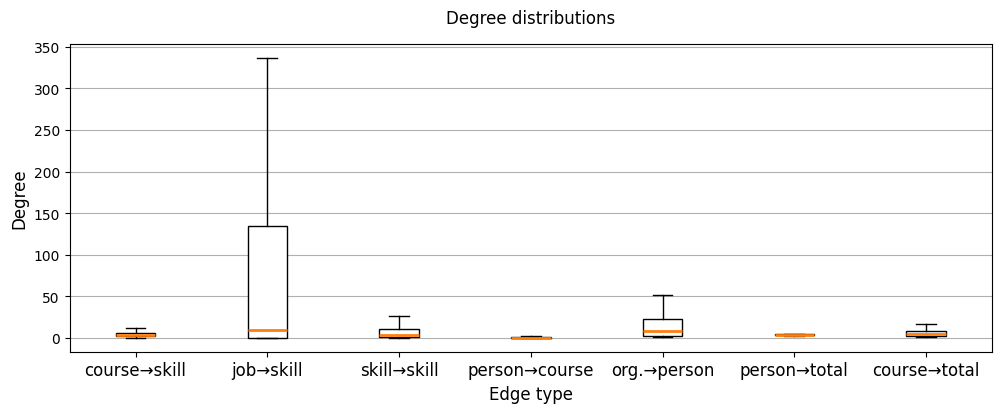

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def make_plot(algorithm,auc_or_ap, scores_per_version,type='BOXPLOT'):
    
    # is_multivariate = 'multivariate' in algorithm
    is_multivariate=False
    
    plt.figure(figsize=(len(scores_per_version.keys())*1.7, 4))
    #plt.title(f'{algorithm}: {auc_or_ap}\n je Datensatz-Version', fontsize=12, y=1.04)
    plt.title('Degree distributions',fontsize=12, y=1.04)
    plt.xlabel('Edge type', fontsize=12)
    plt.ylabel(f'Degree', fontsize=12)
    if type == "BARCHART":
        plt.ylim((0, 1.4))
    else:        
        #plt.ylim((0, 50))
        pass
    #plt.yticks([0, 0.2, 0.4, 0.6, .8, 1], labels=[0, 20, 40, 60, 80, 100])
    if type=="BARCHART":
        plt.text(x=0.5,y=-0.3,s='Die Fehlerbalken markieren die Stichproben-Standardabweichung',ha='left')
    # plt.axes().set_axisbelow(True)
    plt.grid(axis='y', zorder=0)

    colors = ['tab:blue', 'tab:green', 'tab:olive', 'tab:purple','tab:brown','tab:cyan','tab:gray','tab:blue', 'tab:green', 'tab:olive', 'tab:purple','tab:brown','tab:cyan','tab:gray']
    # colors = matplotlib.colormaps['tab10']([0,0,0,0,1,1,1,1,2,2,3,3])
    colors = ['tab:blue','tab:blue','tab:blue','tab:blue','tab:green','tab:green','tab:green','tab:green','tab:olive','tab:olive','tab:purple','tab:purple']
    # colors = ['#1f77b4','#44918a','#41ac5c','#11c80a']
    # colors = ['b','c','g','m']
    # colors = ['tab:blue', 'tab:cyan', 'tab:olive', 'tab:green']
    versionticklabels = []
    scoreinfo = []
    stdinfo = []
    stdpadding = []

    bars = []
    # remove version v1
    # scores = scores.copy()
    # del scores[1]
    i = 0
    srs =[]
    #print('aa')
    
    for version, score in scores_per_version.items():
        
        score = score[auc_or_ap]
        f = version.split('--')[0][0]
        t = version.split('--')[1].strip()[0]
        if f==t:
            t = version.split(',')[1].strip()[0]
            
        if f=='c':
            f='course'
        elif f=='j':
            f='job'
        elif f=='s':
            f='skill'
        elif f=='p':
            f='person'
        elif f=='o':

            f='org.'
        elif f=='t':
            f='total'
        
        if t == 'c':
            t='course'
        elif t=='j':
            t='job'
        elif t=='s':
            t='skill'
        elif t=='p':
            t='person'
        elif t=='o':
            t='organization'
        elif t=='t':
            t='total'
        version = str(f+'→'+t)
        #version = version[0]+"."+version[1]
        label = str(version)
        
        score_summarized = np.sum(score)/len(score)
        color = colors[i]
        # if version in ['1.1','2.1',]:
        #     label = 'Original'
        # else:
        
        versionticklabels.append(label)
        scoreinfo.append(str(int(round(score_summarized*100, 0))))

        sample_std = np.std(score, ddof=1)
        
        stdinfo.append(str(int(round(sample_std*100, 0))))
        stdpadding.append(sample_std)
        srs.append(score)
    
        # # BARCHART
        # if type == "BARCHART":
        #     if not is_multivariate:
        #         bar = plt.bar(i, score_summarized, color=color, yerr=[[sample_std], [sample_std]], zorder=4, error_kw=dict(
        #             capsize=10, capthick=1, zorder=3), edgecolor=color)
        #     else:
        #         bar = plt.bar(i, score_summarized, color=color, edgecolor=color, zorder=4)
        #     bars.append(bar)
        #     srs = []
        
        #     i += 1
            
    
    # if type == "BARCHART":
    #     for i, bar in enumerate(bars):
    #         for rect in bar:
    #             height = rect.get_height()
    #             if not is_multivariate:
    #                 plt.text(rect.get_x() + rect.get_width() / 1.9, height+0.02+stdpadding[i],
    #                         str(scoreinfo[i])+'±'+str(stdinfo[i]), ha='center', va='bottom')
    #                 # table[algorithm].append((scoreinfo[i], stdinfo[i]))
    #             else:
    #                 plt.text(rect.get_x() + rect.get_width() / 1.9, height+0.02,
    #                         str(scoreinfo[i]), ha='center', va='bottom')
    #                 # table[algorithm].append(scoreinfo[i])
        # BARCHART
    
    medians = [np.median(s['AUC']) for s in scores_per_version.values()]
    maxima = [np.max(s['AUC']) for s in scores_per_version.values()]
    minima = [np.min(s['AUC']) for s in scores_per_version.values()]
    q3 = [np.quantile(s['AUC'],0.75) for s in scores_per_version.values()]
    q1 = [np.quantile(s['AUC'],0.25) for s in scores_per_version.values()]
    # round up to integer
    import math
    medians = [int(math.ceil(x)) for x in medians]
    maxima = [int(math.ceil(x)) for x in maxima]
    minima = [int(math.ceil(x)) for x in minima]
    q3 = [int(math.ceil(x)) for x in q3]
    q1 = [int(math.ceil(x)) for x in q1]
    
    
    
   
    
    ## BOXPLOT
    if type == "BOXPLOT":
        medianprops= dict(linestyle='-', linewidth=2, color='tab:orange')
        meanprops= dict(linestyle='-', linewidth=2, color='tab:green')
        #plt.boxplot(srs)
        #bp = plt.boxplot(srs,whis=1.5,showfliers=True)
        bk = plt.boxplot(srs,whis=1.5,showfliers=False, medianprops=medianprops,boxprops=dict(facecolor='white'),patch_artist=True,meanprops=meanprops, widths=0.3)
    
       
        # plt.xticks(range(1,6),['Category 1','C2','C3','C4','C5'],rotation=45)

        # plt.title(f'Titel Plot 1')
        # plt.ylabel('Y Label und Einheit')
        # plt.xlabel('X Label und Einheit')
        # plt.figtext(0,-0.22,'Figure 2')
        # <<< Plot 1

        # >>> Tabelle
      
        # medians = [round(item.get_ydata()[0] ,2) for item in bp['medians']]
        # means = [item.get_ydata()[0] for item in bp['means']]  #  plt.boxplot(data, showmeans=True) um sie zu bekommen
        # maxima = [round(item.get_ydata()[0], 2) for item in bp['caps']][1::2]
        # minima = [round(item.get_ydata()[0], 2) for item in bp['caps']][::2]

        # q3 = [round(max(item.get_ydata()), 2) for item in bp['boxes']]
        # q1 = [round(min(item.get_ydata()), 2) for item in bp['boxes']]
        
        # medians = [str(v).ljust(4,'0') for v in medians]
        # maxima = [str(v).ljust(4,'0') for v in maxima]
        # minima = [str(v).ljust(4,'0') for v in minima]
        # q3 = [str(v).ljust(4,'0') for v in q3]
        # q1 = [str(v).ljust(4,'0') for v in q1]
        
        cols = versionticklabels
        rows =['Q3','Median','Q1']
        rcolors = np.full(len(rows), 'linen')
        ccolors = np.full(len(cols), 'lavender')
        print('rowlables', rows)
        table =plt.table(
            cellText=[q3,medians,q1],
            colWidths = [1]*len(medians),
            rowLabels=rows,
            colLabels=cols,
            cellLoc = 'center', rowLoc = 'center',
            loc='bottom', bbox=[0.0, -0.75, 1, 0.5],
            rowColours=rcolors,
            colColours=ccolors
        
        ) # left, top, width, height
        table.auto_set_font_size(False)
        table.set_fontsize(12)
    ## BOXPLOT
    
   
    
    # # SCATTER
    # if type == 'SCATTER':
    #     points = []
    #     indices = []
    #     for i,s in enumerate(srs):
    #         points += list(s)
    #         indices += list(np.zeros(len(s))+i)
    #     plt.scatter(indices,points)
    if type == "BOXPLOT":
        plt.xticks(ticks=np.arange(len(scores_per_version.keys()))+1, labels=versionticklabels, fontsize=12)
    else:
        plt.xticks(ticks=np.arange(len(scores_per_version.keys())), labels=versionticklabels, fontsize=12)
    # if type =="BOXPLOT" or type=="SCATTER":
    #     plt.yticks(ticks=np.arange(11)*0.1,labels=[str(x*0.1)[:3] for x in np.arange(11)]) # BOXPLOT
    
    # plt.show()
    
    
    plt.savefig('finalpics/boxplot_notable_notable.png', dpi=300, bbox_inches='tight')

    return plt

def plot_compare(scores,type):
    """compare scores for different versions for different algorithms for uni or multivariate"""
    # table = {}
    plots = {}
    for algorithm in scores.keys():
        plots[algorithm] = {    
            
            'AUC':make_plot(algorithm,auc_or_ap='AUC',scores_per_version=scores[algorithm],type=type),
            'AP':make_plot(algorithm,auc_or_ap='AP',scores_per_version=scores[algorithm],type=type)
        }
        plt.show()
        # for version in scores[algorithm].keys():
        #     plots[algorithm][version] = {}
        #     for auc_or_ap, values in scores[algorithm][version].items():

scores_per_version = {}
for k in ['courses_and_programs, skills -- courses and programs',
 'jobs, skills -- jobs',
 'skills, skills -- skills',
 'people, courses and programs -- people',
 'organizations, people -- organizations',
 'people, t -- t',
 'courses_and_programs, t -- t'
 ]:
    key = 'skill'
    scores_per_version[k] = {'AUC':data[k].tolist()}
       
make_plot('aa','AUC',scores_per_version=scores_per_version,type='BOXPLOT')


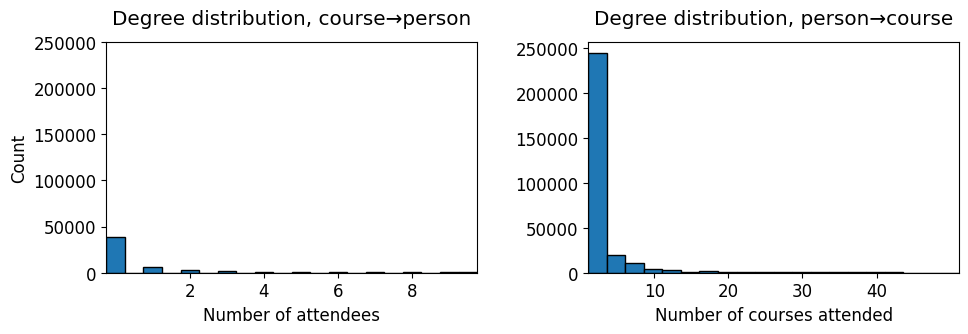

In [182]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

font = {
         'size'   : 12}
matplotlib.rc('font', **font)


def plot_degree(node_degrees, title, xlabel, ylabel, savepath, savefig=False, showfig=True, xlim=None, color='blue', bins=100):
    # Convert to numpy array if it's a list or a PyTorch tensor
    if isinstance(node_degrees, list):
        node_degrees = np.array(node_degrees)
    elif isinstance(node_degrees, torch.Tensor):
        node_degrees = node_degrees.numpy()
        
        
    median = np.median(node_degrees)
    maximum = np.max(node_degrees)
    minimum = np.min(node_degrees)
    # calculate the bins based on the node degrees
    node_degrees = deepcopy(node_degrees)
    node_degrees = np.array(node_degrees)
    node_degrees = node_degrees[node_degrees>=xlim[0]]
    node_degrees = node_degrees[node_degrees<=xlim[1]]
        
    # create two plots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
    # add space between the plots
    fig.subplots_adjust(wspace=0.3)
    
    # Create the histogram
    ax1.hist(node_degrees, bins=bins, color=color, edgecolor='black')
    # change width of bars
    #for patch in plt.gca().patches:
    #    patch.set_width(0.9)

    # Set the title and labels
    #plt.suptitle(title,y=1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_ylim([0, 250000])
    ax1.set_title(title,y=1.04)
    
    # Set the x limits
    if xlim is not None:
        ax1.set_xlim(xlim)

    # Set the x and y ticks to be integers
    #plt.xticks(np.arange(np.min(node_degrees), np.max(node_degrees)+1, 1.0))
    # make xticks 25 steps if xlim[1] <100, 250 steps if xlim[1] <1000, 2500 steps if xlim[1] <10000 and so on
    for i in range(1,10):
        if xlim[1] < 10**i:
            tick = 10**(i-1)
            if tick == 100:
                tick = 50
            if tick==1:
                tick=2
            x_ticks = np.arange(xlim[0], xlim[1],tick )
           
            break
    
    tickers = [2,4,6,8]
    ax1.set_xticks(np.array(tickers)+0.25, tickers)
    #plt.yticks(np.arange(0, np.max(np.histogram(node_degrees, bins=np.arange(node_degrees.min(), node_degrees.max()+2) - 0.5)[0])+1, 1.0))

    # Save the figure if requested
    node_degree2 = data['people, courses and programs -- people']
    median2 = np.median(node_degree2)
    maximum2 = np.max(node_degree2)
    minimum2 = np.min(node_degree2)
    node_degree2 = deepcopy(node_degree2)
    node_degree2 = np.array(node_degree2)
    xlim = [0, 50]
    node_degree2 = node_degree2[node_degree2>=xlim[0]]
    node_degree2 = node_degree2[node_degree2<=xlim[1]]
    
    ax2.hist(node_degree2, bins=bins, color=color, edgecolor='black')
    # change width of bars
    #for patch in plt.gca().patches:
    #    patch.set_width(0.9)
    #ax2.set_ylim([0, 40000])
    ax2.set_xlabel('Number of courses attended')
    #ax2.set_ylabel(ylabel)
    ax2.set_xlim(xlim)
    tickers = [10,20,30,40]
    ax2.set_xticks(np.array(tickers)-1.1, tickers)
    
    ax2.set_title(f"Degree distribution, person→course",y=1.04)
    
    
    
    
    
    if savefig:
        plt.savefig(savepath+f"{minimum}_{maximum}_median{median}_people_min{minimum2}_max{maximum2}_med{median}.png", dpi=300, bbox_inches='tight')

    # Show the figure if requested
    if showfig:
        plt.show()


plot_degree(data['courses_and_programs, courses and programs -- people'], title='Degree distribution, course→person', xlabel='Number of attendees', ylabel='Count', savepath='finalpics/degree_distribution_people.png', savefig=True, showfig=False, xlim=[0, 10], color='tab:blue', bins=20)

In [52]:
data[''].mean()

0.9774552

In [69]:
for k in data.keys():
    print(k)

courses_and_programs, skills -- courses and programs
courses_and_programs, courses and programs -- qualifications
courses_and_programs, courses and programs -- people
courses_and_programs, t -- t
qualifications, skills -- qualifications
qualifications, courses and programs -- qualifications
qualifications, t -- t
skills, skills -- qualifications
skills, skills -- courses and programs
skills, skills -- jobs
skills, skills -- skills
skills, t -- t
people, courses and programs -- people
people, jobs -- people
people, people -- people
people, people -- organizations
people, t -- t
jobs, jobs -- people
jobs, jobs -- jobs
jobs, skills -- jobs
jobs, t -- t
organizations, people -- organizations
organizations, t -- t


aa
rowlables ['Median', 'Maximum', 'Minimum', 'Q3', 'Q1']


<module 'matplotlib.pyplot' from '/home/amos/mambaforge/envs/pyg_torch21/lib/python3.10/site-packages/matplotlib/pyplot.py'>

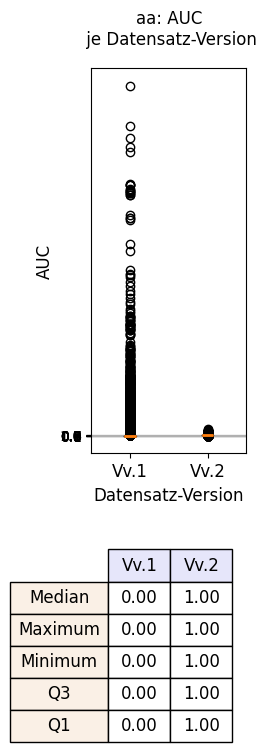

aa
{'AUC': {'v1': {'AUC': [7.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 238.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 50.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 53.0, 0.0, 2.0, 1

KeyError: 'AUC'

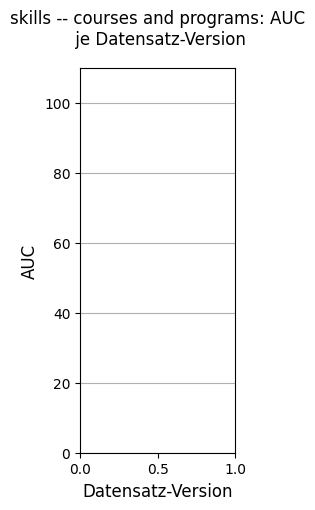

In [16]:
plot_data = {}
for k,v in data.items():
    plot_data[k] = {'AUC':{'v1':{'AUC':v.tolist()}}, 'AP':{'v1':{'AUC':v.tolist()}}}
    
plot_compare(plot_data,'BOXPLOT')

In [24]:
df1

,Wall time,Step,Value
0,1.699019e+09,0,0.459716
1,1.699021e+09,9600,0.043713
2,1.699022e+09,19200,0.055234
3,1.699024e+09,28800,0.037526
4,1.699025e+09,38400,0.030460
5,1.699027e+09,48000,0.009179
6,1.699028e+09,57600,0.023952
7,1.699030e+09,67200,0.024818
8,1.699031e+09,76800,0.010579
9,1.699033e+09,86400,0.030494


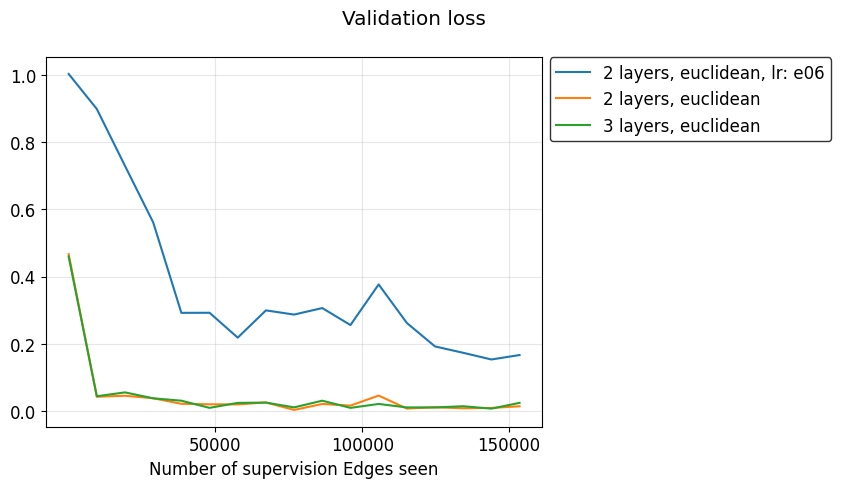

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

font = {
         'size'   : 12}
matplotlib.rc('font', **font)


df1 = pd.read_csv('timeseries/layer2euclid_val.csv')
df2 = pd.read_csv('timeseries/layer3euclid_val.csv')
df3 = pd.read_csv('timeseries/lre6val.csv')


TSBOARD_SMOOTHING = [ 0.5]

smooth = []
for ts_factor in TSBOARD_SMOOTHING:
    #smooth.append()
    smooth.append(df2.ewm(alpha=(1 - ts_factor)).mean())
    smooth.append(df3.ewm(alpha=(1 - ts_factor)).mean())

ts_factor=0.5

plt.plot(df1['Step'],df3["Value"])
plt.plot(df1['Step'],df2["Value"])
plt.plot(df1['Step'],df1["Value"])

plt.suptitle("Validation loss", x=0.7)
plt.grid(alpha=0.3)
plt.xlabel('Number of supervision Edges seen')
# add legend with split names


leg = plt.legend(['2 layers, euclidean, lr: e06','2 layers, euclidean', '3 layers, euclidean'], loc='upper right', bbox_to_anchor=(1.6, 1.022))
plt.xticks([50000,100000,150000])
leg.get_frame().set_edgecolor('black')

plt.show()

In [16]:
smooth

[       Wall time           Step     Value
 0   1.699019e+09       0.000000  0.459716
 1   1.699020e+09    6400.000000  0.182380
 2   1.699021e+09   13714.285714  0.109725
 3   1.699023e+09   21760.000000  0.071219
 4   1.699024e+09   30348.387097  0.050182
 5   1.699025e+09   39314.285714  0.029355
 6   1.699027e+09   48529.133858  0.026632
 7   1.699028e+09   57901.176471  0.025722
 8   1.699030e+09   67369.080235  0.018136
 9   1.699031e+09   76893.841642  0.024321
 10  1.699033e+09   86451.587689  0.016724
 11  1.699034e+09   96028.131868  0.018765
 12  1.699036e+09  105615.236235  0.014604
 13  1.699037e+09  115208.203626  0.012497
 14  1.699039e+09  124804.394665  0.013235
 15  1.699040e+09  134402.343786  0.010043
 16  1.699042e+09  144001.245127  0.017041,
        Wall time           Step     Value
 0   1.699020e+09       0.000000  0.466656
 1   1.699021e+09    6400.000000  0.183695
 2   1.699023e+09   13714.285714  0.104554
 3   1.699026e+09   21760.000000  0.068931
 4   1.699